<a href="https://colab.research.google.com/github/mehedi832766/AI-Lab/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pre-requisite

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Tue Feb 28 18:37:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# pip install split-folders

In [ ]:
# import splitfolders

In [ ]:
# input_folder = '/content/drive/MyDrive/Thesis/Main_Sign_Data'

In [ ]:
# splitfolders.ratio(input_folder, output="/content/drive/MyDrive/Thesis/Split_data",
                  #  seed=42,ratio=(.7,.2,.1))

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
from glob import glob
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Thesis/Split_data3.0/train'
valid_path = '/content/drive/MyDrive/Thesis/Split_data3.0/val'
test_path='/content/drive/MyDrive/Thesis/Split_data3.0/test'


In [ ]:
  # useful for getting number of output classes
folders = sorted(glob('/content/drive/MyDrive/Thesis/Split_data3.0/train/*'))

In [ ]:
folders

In [ ]:
len(folders)

39

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1343 images belonging to 39 classes.


In [ ]:
len(training_set)

42

In [ ]:
val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 224 images belonging to 39 classes.


In [ ]:
len(val_set)

7

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 224,
                                            class_mode = 'categorical')


Found 372 images belonging to 39 classes.


In [ ]:
images, labels = next(test_set)
print(images.shape)
print(labels.shape)
type(images)

(224, 224, 224, 3)
(224, 39)


numpy.ndarray

In [ ]:
len(np.unique(np.argmax(labels,axis=1)))

39

In [ ]:
len(images)

1

In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'01. KA': 0, '02. KHA': 1, '03. GA': 2, '04. GHA': 3, '05. CHA': 4, '06. SCHA': 5, '07. JA': 6, '08. JHA': 7, '09. TA': 8, '10. THA': 9, '11. DA': 10, '12. DHA': 11, '13. TO': 12, '14. THO': 13, '15. DO': 14, '16. DHO': 15, '17. NA': 16, '18. PA': 17, '19. PHA': 18, '20. BA': 19, '21. BHA': 20, '22. MA': 21, '23. YA': 22, '24. RA': 23, '25. LA': 24, '26. SA': 25, '27. HA': 26, '28. RHA': 27, '29. UN': 28, '30. BI': 29, '@1. A': 30, '@2. AA': 31, '@3. E': 32, '@4. U': 33, '@5. Y': 34, '@6. O': 35, 'joint': 36, 'space': 37, 'stop': 38}


In [ ]:
li = list(class_dict.keys())
print(li)

['01. KA', '02. KHA', '03. GA', '04. GHA', '05. CHA', '06. SCHA', '07. JA', '08. JHA', '09. TA', '10. THA', '11. DA', '12. DHA', '13. TO', '14. THO', '15. DO', '16. DHO', '17. NA', '18. PA', '19. PHA', '20. BA', '21. BHA', '22. MA', '23. YA', '24. RA', '25. LA', '26. SA', '27. HA', '28. RHA', '29. UN', '30. BI', '@1. A', '@2. AA', '@3. E', '@4. U', '@5. Y', '@6. O', 'joint', 'space', 'stop']


In [ ]:
len(li)

39

#**VGG16**

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
vx = Flatten()(vgg16.output)

In [ ]:
v_prediction = Dense(len(folders), activation='softmax')(vx)

# create a model object
v_model = Model(inputs=vgg16.input, outputs=v_prediction)

In [ ]:
# view the structure of the model
v_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import layers
for i, layer in enumerate(v_model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 flatten
20 dense


In [ ]:
# tell the model what cost and optimization method to use
v_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
# r_weightpath = "/content/drive/MyDrive/Thesis/weights/checkpoint/res_best_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
v_weightpath = "/content/drive/MyDrive/Thesis/Augmented/Models/Weights/VGG16/v16_best_weights_280223_sparse.hdf5"
checkpoint = ModelCheckpoint(v_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
# checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True,  mode='max')

early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

log_csv=CSVLogger('/content/drive/MyDrive/Thesis/Augmented/Models/Logs/VGG16/v16_logs_280223_sparse.csv',separator=',',append=False)

callbacks_list = [checkpoint,log_csv]

# fit the model
# Run the cell. It will take some time to execute
v = v_model.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks=callbacks_list
)

v_model.save('/content/drive/MyDrive/Thesis/Augmented/Models/model_vgg16_280223_sparse.h5')

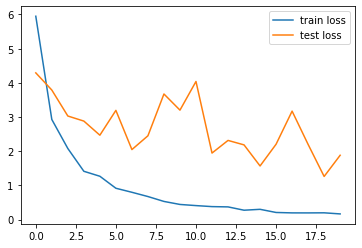

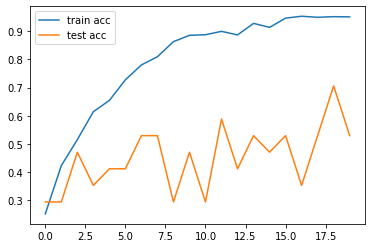

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(v.history['loss'], label='train loss')
plt.plot(v.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/Augmented/Models/Fig/VGG16/vLossVal_loss_280323')

# plot the accuracy
plt.plot(v.history['accuracy'], label='train acc')
plt.plot(v.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/Augmented/Models/Fig/VGG16/vAccVal_acc_280323')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Thesis/Augmented/Models/model_vgg16_280223.h5')

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
len(images)

32

In [ ]:
labels.shape

(224, 39)

In [ ]:
ypred = model.predict(images)
pred=np.argmax(ypred, axis=1)
ground = np.argmax(labels,axis=1)
print(classification_report(ground,pred))

7/7 [==============================] - 1s 132ms/step
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5
           3       0.00      0.00      0.00         4
           4       1.00      0.80      0.89         5
           5       0.43      0.60      0.50         5
           6       1.00      0.75      0.86         4
           7       0.67      0.40      0.50         5
           8       0.83      0.83      0.83         6
           9       0.40      0.67      0.50         3
          10       0.50      0.25      0.33         4
          11       0.00      0.00      0.00         4
          12       0.25      0.50      0.33         6
          13       0.50      0.29      0.36         7
          14       0.21      0.50      0.30         6
          15       0.83      0.62      0.71         8
          16       0.33     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cr=classification_report(ground,pred, output_dict=True)
v6_cr = pd.DataFrame(cr).transpose()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
v6_rep=v6_cr.iloc[39:42,:]
v6_rep

,precision,recall,f1-score,support
accuracy,0.513393,0.513393,0.513393,0.513393
macro avg,0.565018,0.526689,0.509291,224.000000
weighted avg,0.585438,0.513393,0.515774,224.000000


In [ ]:
v6_cr=v6_cr.iloc[0:39,:]

In [ ]:
v6_cr['class']=li

In [ ]:
print(v6_cr)

    precision    recall  f1-score  support     class
0    0.333333  0.250000  0.285714      4.0    01. KA
1    0.400000  0.400000  0.400000      5.0   02. KHA
2    0.500000  0.600000  0.545455      5.0    03. GA
3    0.000000  0.000000  0.000000      4.0   04. GHA
4    1.000000  0.800000  0.888889      5.0   05. CHA
5    0.428571  0.600000  0.500000      5.0  06. SCHA
6    1.000000  0.750000  0.857143      4.0    07. JA
7    0.666667  0.400000  0.500000      5.0   08. JHA
8    0.833333  0.833333  0.833333      6.0    09. TA
9    0.400000  0.666667  0.500000      3.0   10. THA
10   0.500000  0.250000  0.333333      4.0    11. DA
11   0.000000  0.000000  0.000000      4.0   12. DHA
12   0.250000  0.500000  0.333333      6.0    13. TO
13   0.500000  0.285714  0.363636      7.0   14. THO
14   0.214286  0.500000  0.300000      6.0    15. DO
15   0.833333  0.625000  0.714286      8.0   16. DHO
16   0.333333  0.571429  0.421053      7.0    17. NA
17   1.000000  0.500000  0.666667      8.0    

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(39):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(ground)==l,
                                                      np.array(pred)==l,
                                                      pos_label=True,average=None)
    res.append([li[l],recall[0],recall[1]])

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
specicifity=pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
print(specicifity)

       class  sensitivity  specificity
0     01. KA     0.990909     0.250000
1    02. KHA     0.986301     0.400000
2     03. GA     0.986301     0.600000
3    04. GHA     1.000000     0.000000
4    05. CHA     1.000000     0.800000
5   06. SCHA     0.981735     0.600000
6     07. JA     1.000000     0.750000
7    08. JHA     0.995434     0.400000
8     09. TA     0.995413     0.833333
9    10. THA     0.986425     0.666667
10    11. DA     0.995455     0.250000
11   12. DHA     0.986364     0.000000
12    13. TO     0.958716     0.500000
13   14. THO     0.990783     0.285714
14    15. DO     0.949541     0.500000
15   16. DHO     0.995370     0.625000
16    17. NA     0.963134     0.571429
17    18. PA     1.000000     0.500000
18   19. PHA     0.990826     0.833333
19    20. BA     0.949541     0.666667
20   21. BHA     0.973094     1.000000
21    22. MA     0.986111     0.250000
22    23. YA     0.990741     0.375000
23    24. RA     0.977169     0.200000
24    25. LA     1.000000

In [ ]:
v6_matrix=pd.merge(specicifity, v6_cr, on ='class')

In [ ]:
# result = pd.concat([specicifity,resnet_cr], axis=1,ignore_index=True )
v6_matrix

,class,sensitivity,specificity,precision,recall,f1-score,support
0,01. KA,0.990909,0.250000,0.333333,0.250000,0.285714,4.0
1,02. KHA,0.986301,0.400000,0.400000,0.400000,0.400000,5.0
2,03. GA,0.986301,0.600000,0.500000,0.600000,0.545455,5.0
3,04. GHA,1.000000,0.000000,0.000000,0.000000,0.000000,4.0
4,05. CHA,1.000000,0.800000,1.000000,0.800000,0.888889,5.0
5,06. SCHA,0.981735,0.600000,0.428571,0.600000,0.500000,5.0
6,07. JA,1.000000,0.750000,1.000000,0.750000,0.857143,4.0
7,08. JHA,0.995434,0.400000,0.666667,0.400000,0.500000,5.0
8,09. TA,0.995413,0.833333,0.833333,0.833333,0.833333,6.0
9,10. THA,0.986425,0.666667,0.400000,0.666667,0.500000,3.0


In [ ]:
v6_matrix.to_csv('/content/drive/MyDrive/Thesis/Augmented/Reports/vgg16_classification_report.csv')


In [ ]:
v6_rep.to_csv('/content/drive/MyDrive/Thesis/Augmented/Reports/vgg16_acc_report.csv')

#Resnet50

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
rx = Flatten()(resnet50.output)

In [ ]:
r_prediction = Dense(len(folders), activation='softmax')(rx)

# create a model object
r_model = Model(inputs=resnet50.input, outputs=r_prediction)

In [ ]:
# view the structure of the model
r_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['accuracy']
# )


r_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
# r_weightpath = "/content/drive/MyDrive/Thesis/weights/checkpoint/res_best_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
r_weightpath = "/content/drive/MyDrive/Thesis/model/resnet50/res_best_weights.hdf5"
checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
# checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True,  mode='max')

early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

log_csv=CSVLogger('/content/drive/MyDrive/Thesis/model/resnet50/logs.csv',separator=',',append=False)

callbacks_list = [checkpoint,early_stop,log_csv]

# fit the model
# Run the cell. It will take some time to execute
r = r_model.fit(
  training_set,
  validation_data=val_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks=callbacks_list
)

In [ ]:
# save it as a h5 file
r_model.save('/content/drive/MyDrive/Thesis/model/resnet50/resnet.h5')

In [ ]:
import matplotlib.pyplot as plt

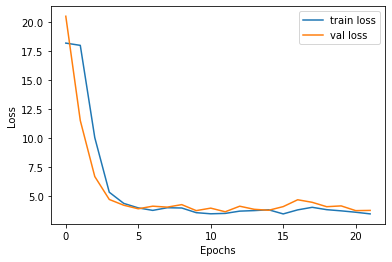

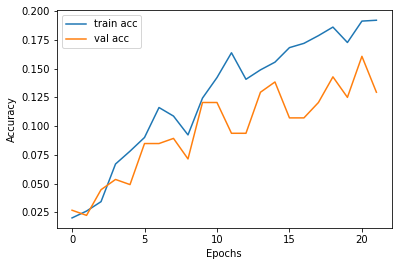

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/resnet50/LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/resnet50/AccVal_acc')

In [ ]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model=load_model('/content/drive/MyDrive/Thesis/model/resnet50/resnet.h5')

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
ypred = model.predict(images)
pred=np.argmax(ypred, axis=1)
ground = np.argmax(labels,axis=1)
print(classification_report(ground,pred))

7/7 [==============================] - 1s 98ms/step
              precision    recall  f1-score   support

           0       0.06      0.20      0.09         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.17      0.33      0.22         3
           5       0.25      0.14      0.18         7
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           8       1.00      0.17      0.29         6
           9       1.00      0.33      0.50         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         7
          16       0.00      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cr=classification_report(ground,pred, output_dict=True)
resnet_cr = pd.DataFrame(cr).transpose()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
resnet_rep=resnet_cr.iloc[39:42,:]
resnet_rep

,precision,recall,f1-score,support
accuracy,0.147321,0.147321,0.147321,0.147321
macro avg,0.178839,0.144119,0.120518,224.000000
weighted avg,0.184569,0.147321,0.120974,224.000000


In [ ]:
resnet_cr=resnet_cr.iloc[0:39,:]

In [ ]:
resnet_cr['class']=li

<ipython-input-117-9b906796ddf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resnet_cr['class']=li


In [ ]:
print(resnet_cr)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(39):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(ground)==l,
                                                      np.array(pred)==l,
                                                      pos_label=True,average=None)
    res.append([li[l],recall[0],recall[1]])

In [ ]:
import pandas as pd

In [ ]:
specicifity=pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
print(specicifity)

In [ ]:
resnet_matrix=pd.merge(specicifity, resnet_cr, on ='class')

In [ ]:
# result = pd.concat([specicifity,resnet_cr], axis=1,ignore_index=True )
resnet_matrix

In [ ]:
resnet_matrix.to_csv('/content/drive/MyDrive/Thesis/model/resnet50/classification_report.csv')


In [ ]:
resnet_rep.to_csv('/content/drive/MyDrive/Thesis/model/resnet50/acc_report.csv')

#VGG19


In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
v9x = Flatten()(vgg19.output)

In [ ]:
v9_prediction = Dense(len(folders), activation='softmax')(v9x)

# create a model object
v9_model = Model(inputs=vgg19.input, outputs=v9_prediction)

In [ ]:
# view the structure of the model
v9_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
v9_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
# r_weightpath = "/content/drive/MyDrive/Thesis/weights/checkpoint/res_best_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
v9_weightpath = "/content/drive/MyDrive/Thesis/model/vgg19/v19_best_weights.hdf5"
checkpoint = ModelCheckpoint(v9_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
# checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True,  mode='max')

early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

log_csv=CSVLogger('/content/drive/MyDrive/Thesis/model/vgg19/v19_logs.csv',separator=',',append=False)

callbacks_list = [checkpoint,early_stop,log_csv]

# fit the model
# Run the cell. It will take some time to execute
v9 = v9_model.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks=callbacks_list
)

v9_model.save('/content/drive/MyDrive/Thesis/model/vgg19/model_vgg19.h5')

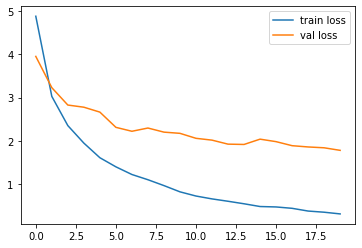

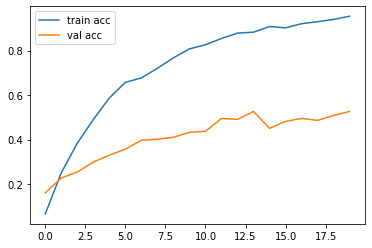

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(v9.history['loss'], label='train loss')
plt.plot(v9.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/vgg19/vLossVal_loss')

# plot the accuracy
plt.plot(v9.history['accuracy'], label='train acc')
plt.plot(v9.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Thesis/model/vgg19/vAccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/Thesis/model/vgg19/model_vgg19.h5')

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
ypred = model.predict(images)
pred=np.argmax(ypred, axis=1)
ground = np.argmax(labels,axis=1)
print(classification_report(ground,pred))

7/7 [==============================] - 1s 195ms/step
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.75      0.60      0.67         5
           2       0.62      0.83      0.71         6
           3       0.25      0.50      0.33         4
           4       0.75      1.00      0.86         3
           5       0.50      0.14      0.22         7
           6       0.83      1.00      0.91         5
           7       1.00      0.17      0.29         6
           8       1.00      0.67      0.80         6
           9       0.75      1.00      0.86         3
          10       0.00      0.00      0.00         3
          11       0.18      0.33      0.24         6
          12       0.40      0.40      0.40         5
          13       0.60      0.43      0.50         7
          14       0.33      0.25      0.29         8
          15       1.00      0.43      0.60         7
          16       0.38     

In [ ]:
cr=classification_report(ground,pred, output_dict=True)
v9_cr = pd.DataFrame(cr).transpose()

In [ ]:
v9_rep=v9_cr.iloc[39:42,:]
v9_rep

,precision,recall,f1-score,support
accuracy,0.549107,0.549107,0.549107,0.549107
macro avg,0.607287,0.551526,0.541617,224.000000
weighted avg,0.616940,0.549107,0.542873,224.000000


In [ ]:
v9_cr=v9_cr.iloc[0:39,:]

In [ ]:
v9_cr['class']=li

In [ ]:
print(v9_cr)

    precision    recall  f1-score  support     class
0    0.333333  0.200000  0.250000      5.0    01. KA
1    0.750000  0.600000  0.666667      5.0   02. KHA
2    0.625000  0.833333  0.714286      6.0    03. GA
3    0.250000  0.500000  0.333333      4.0   04. GHA
4    0.750000  1.000000  0.857143      3.0   05. CHA
5    0.500000  0.142857  0.222222      7.0  06. SCHA
6    0.833333  1.000000  0.909091      5.0    07. JA
7    1.000000  0.166667  0.285714      6.0   08. JHA
8    1.000000  0.666667  0.800000      6.0    09. TA
9    0.750000  1.000000  0.857143      3.0   10. THA
10   0.000000  0.000000  0.000000      3.0    11. DA
11   0.181818  0.333333  0.235294      6.0   12. DHA
12   0.400000  0.400000  0.400000      5.0    13. TO
13   0.600000  0.428571  0.500000      7.0   14. THO
14   0.333333  0.250000  0.285714      8.0    15. DO
15   1.000000  0.428571  0.600000      7.0   16. DHO
16   0.375000  0.428571  0.400000      7.0    17. NA
17   0.666667  0.666667  0.666667      6.0    

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(39):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(ground)==l,
                                                      np.array(pred)==l,
                                                      pos_label=True,average=None)
    res.append([li[l],recall[0],recall[1]])

In [ ]:
specicifity=pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
print(specicifity)

       class  sensitivity  specificity
0     01. KA     0.990868     0.200000
1    02. KHA     0.995434     0.600000
2     03. GA     0.986239     0.833333
3    04. GHA     0.972727     0.500000
4    05. CHA     0.995475     1.000000
5   06. SCHA     0.995392     0.142857
6     07. JA     0.995434     1.000000
7    08. JHA     1.000000     0.166667
8     09. TA     1.000000     0.666667
9    10. THA     0.995475     1.000000
10    11. DA     0.995475     0.000000
11   12. DHA     0.958716     0.333333
12    13. TO     0.986301     0.400000
13   14. THO     0.990783     0.428571
14    15. DO     0.981481     0.250000
15   16. DHO     1.000000     0.428571
16    17. NA     0.976959     0.428571
17    18. PA     0.990826     0.666667
18   19. PHA     0.990783     0.714286
19    20. BA     0.972350     0.571429
20   21. BHA     0.967742     0.714286
21    22. MA     0.934884     0.666667
22    23. YA     0.986239     0.666667
23    24. RA     0.995370     0.625000
24    25. LA     0.995434

In [ ]:
v9_matrix=pd.merge(specicifity, v9_cr, on ='class')

In [ ]:
# result = pd.concat([specicifity,resnet_cr], axis=1,ignore_index=True )
v9_matrix

,class,sensitivity,specificity,precision,recall,f1-score,support
0,01. KA,0.990868,0.200000,0.333333,0.200000,0.250000,5.0
1,02. KHA,0.995434,0.600000,0.750000,0.600000,0.666667,5.0
2,03. GA,0.986239,0.833333,0.625000,0.833333,0.714286,6.0
3,04. GHA,0.972727,0.500000,0.250000,0.500000,0.333333,4.0
4,05. CHA,0.995475,1.000000,0.750000,1.000000,0.857143,3.0
5,06. SCHA,0.995392,0.142857,0.500000,0.142857,0.222222,7.0
6,07. JA,0.995434,1.000000,0.833333,1.000000,0.909091,5.0
7,08. JHA,1.000000,0.166667,1.000000,0.166667,0.285714,6.0
8,09. TA,1.000000,0.666667,1.000000,0.666667,0.800000,6.0
9,10. THA,0.995475,1.000000,0.750000,1.000000,0.857143,3.0


In [ ]:
v9_matrix.to_csv('/content/drive/MyDrive/Thesis/model/vgg19/classification_report.csv')


In [ ]:
v9_rep.to_csv('/content/drive/MyDrive/Thesis/model/vgg19/acc_report.csv')


#**Alexnet**

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (227, 227),
                                                 batch_size = 80,
                                                 class_mode = 'categorical')

Found 1343 images belonging to 39 classes.


In [ ]:
len(training_set)

17

In [ ]:
val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (227, 227),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 224 images belonging to 39 classes.


In [ ]:
len(val_set)

7

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (227, 227),
                                            batch_size = 60,
                                            class_mode = 'categorical')
images, labels = next(test_set)
print(images.shape)
print(labels.shape)
type(images)

Found 372 images belonging to 39 classes.
(60, 227, 227, 3)
(60, 39)


numpy.ndarray

In [ ]:
# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 39, activation = 'softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

**Loading Weights To The Model**

In [ ]:
# classifier.load_weights('/content/drive/MyDrive/Thesis/model_weights/model_vgg16_5pm_3.h5')

**Fine Tuning By Freezing Some Layers Of Our Model**

In [ ]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten_3
14 dense_3
15 dropout
16 batch_normalization_5
17 dense_4
18 dropout_1
19 batch_normalization_6
20 dense_5
21 dropout_2
22 batch_normalization_7
23 dense_6


In [ ]:
# we chose to train the top 2 conv blocks, i.e. we will freeze
# the first 8 layers and unfreeze the rest:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = True


Freezed layers:
0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten_3
14 dense_3
15 dropout
16 batch_normalization_5
17 dense_4
18 dropout_1
19 batch_normalization_6


**Model Summary After Freezing**

In [ ]:
#trainable parameters decrease after freezing some bottom layers   
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

**Compiling the Model**

In [ ]:
from keras.optimizers.optimizer_v2 import adam
# Compiling the Model
from keras import optimizers
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
# r_weightpath = "/content/drive/MyDrive/Thesis/weights/checkpoint/res_best_weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
v9_weightpath = "/content/drive/MyDrive/Thesis/model/alexnet/alex_best_weights.hdf5"
checkpoint = ModelCheckpoint(v9_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
# checkpoint = ModelCheckpoint(r_weightpath, monitor='val_accuracy', verbose=1, save_best_only=True,  mode='max')

early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

log_csv=CSVLogger('/content/drive/MyDrive/Thesis/model/alexnet/alex_logs.csv',separator=',',append=False)

callbacks_list = [checkpoint,early_stop,log_csv]

#fitting images to CNN
history = classifier.fit_generator(training_set,
                         steps_per_epoch=len(training_set),
                         validation_data=val_set,
                         epochs=25,
                         validation_steps=len(val_set),
                         callbacks=callbacks_list)
#saving model
filepath="/content/drive/MyDrive/Thesis/model/alexnet/AlexNetModel.h5"
classifier.save(filepath)

<ipython-input-193-3ba99adb4363>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


Epoch 1/25
17/17 [==============================] - ETA: 0s - loss: 4.7578 - accuracy: 0.0365
Epoch 1: val_accuracy improved from -inf to 0.02232, saving model to /content/drive/MyDrive/Thesis/model/alexnet/alex_best_weights.hdf5
17/17 [==============================] - 67s 4s/step - loss: 4.7578 - accuracy: 0.0365 - val_loss: 55.6933 - val_accuracy: 0.0223
Epoch 2/25
17/17 [==============================] - ETA: 0s - loss: 4.3172 - accuracy: 0.0462
Epoch 2: val_accuracy improved from 0.02232 to 0.02679, saving model to /content/drive/MyDrive/Thesis/model/alexnet/alex_best_weights.hdf5
17/17 [==============================] - 64s 4s/step - loss: 4.3172 - accuracy: 0.0462 - val_loss: 59.4844 - val_accuracy: 0.0268
Epoch 3/25
17/17 [==============================] - ETA: 0s - loss: 3.9798 - accuracy: 0.0596
Epoch 3: val_accuracy did not improve from 0.02679
17/17 [==============================] - 61s 4s/step - loss: 3.9798 - accuracy: 0.0596 - val_loss: 37.5616 - val_accuracy: 0.0223
Ep

**Visualising Training Progress**

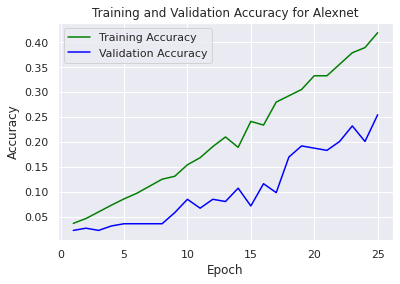

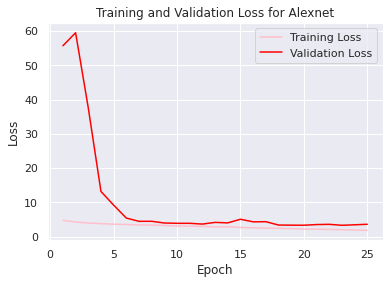

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Alexnet')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss for Alexnet')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model=load_model("/content/drive/MyDrive/Thesis/model/alexnet/AlexNetModel.h5")

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import numpy as np

In [ ]:
len(ground)

60

In [ ]:
ypred = model.predict(images)
pred=np.argmax(ypred, axis=1)
ground = np.argmax(labels,axis=1)
print(classification_report(ground,pred))

2/2 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.67      0.67      0.67         3
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         3
          12       1.00      0.33      0.50         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.50      0.25      0.33         4
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
cr=classification_report(ground,pred, output_dict=True)
a_cr = pd.DataFrame(cr).transpose()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
a_rep=a_cr.iloc[36:39,:]
a_rep

,precision,recall,f1-score,support,class


In [ ]:
a_cr=a_cr.iloc[0:36,:]

In [ ]:
a_cr['class']=li

ValueError: ignored

In [ ]:
print(a_cr)

              precision    recall  f1-score  support     class
0              0.000000  0.000000  0.000000     2.00    01. KA
1              1.000000  0.500000  0.666667     2.00   02. KHA
2              0.000000  0.000000  0.000000     1.00    03. GA
4              0.000000  0.000000  0.000000     1.00   04. GHA
6              1.000000  1.000000  1.000000     1.00   05. CHA
7              0.000000  0.000000  0.000000     1.00  06. SCHA
8              0.000000  0.000000  0.000000     0.00    07. JA
9              0.666667  0.666667  0.666667     3.00   08. JHA
10             1.000000  1.000000  1.000000     1.00    09. TA
11             0.000000  0.000000  0.000000     3.00   10. THA
12             1.000000  0.333333  0.500000     3.00    11. DA
13             0.000000  0.000000  0.000000     2.00   12. DHA
14             0.000000  0.000000  0.000000     2.00    13. TO
15             0.500000  0.250000  0.333333     4.00   14. THO
16             0.000000  0.000000  0.000000     1.00   

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in range(39):
    prec,recall,_,_ = precision_recall_fscore_support(np.array(ground)==l,
                                                      np.array(pred)==l,
                                                      pos_label=True,average=None)
    res.append([li[l],recall[0],recall[1]])

In [ ]:
specicifity=pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

In [ ]:
print(specicifity)

In [ ]:
a_matrix=pd.merge(specicifity, a_cr, on ='class')

In [ ]:
# result = pd.concat([specicifity,resnet_cr], axis=1,ignore_index=True )
a_matrix

In [ ]:
a_matrix.to_csv('/content/drive/MyDrive/Thesis/model/alexnet/classification_report.csv')


In [ ]:
a_rep.to_csv('/content/drive/MyDrive/Thesis/model/alexnet/acc_report.csv')

**Predicting New Test Image(s)**

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "../input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

#Overall

In [ ]:
res = pd.read_csv('/content/drive/MyDrive/Thesis/model/resnet50/logs.csv')
v6= pd.read_csv('/content/drive/MyDrive/Thesis/model/vgg16/v16_logs.csv')
v9=pd.read_csv('/content/drive/MyDrive/Thesis/model/vgg19/v19_logs.csv')

In [ ]:
res = res.iloc[:20,:]

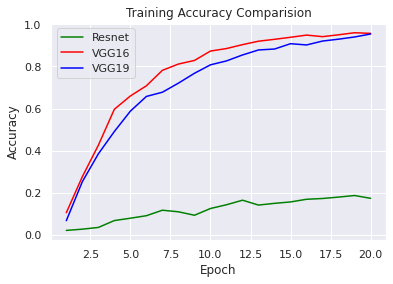

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = res['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(res['loss']) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Resnet')
plt.plot(epochs, v6['accuracy'], color='red', label='VGG16')
plt.plot(epochs, v9['accuracy'], color='blue', label='VGG19')
# plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training Accuracy Comparision')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# plt.figure()
# #loss plot
# plt.plot(epochs, loss, color='pink', label='Training Loss')
# plt.plot(epochs, val_loss, color='red', label='Validation Loss')
# plt.title('Training and Validation Loss for Alexnet')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

plt.show()

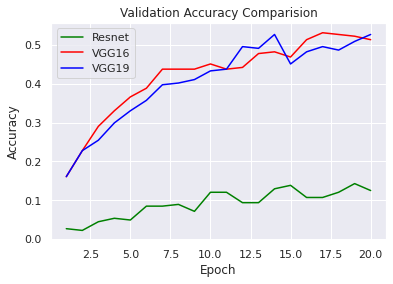

In [ ]:
# acc = res['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(res['loss']) + 1)

#accuracy plot
plt.plot(epochs, res['val_accuracy'], color='green', label='Resnet')
plt.plot(epochs, v6['val_accuracy'], color='red', label='VGG16')
plt.plot(epochs, v9['val_accuracy'], color='blue', label='VGG19')
# plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Validation Accuracy Comparision')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# plt.figure()
# #loss plot
# plt.plot(epochs, loss, color='pink', label='Training Loss')
# plt.plot(epochs, val_loss, color='red', label='Validation Loss')
# plt.title('Training and Validation Loss for Alexnet')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

plt.show()

In [ ]:
ra=pd.read_csv('/content/drive/MyDrive/Thesis/model/resnet50/acc_report.csv')
v6a=pd.read_csv('/content/drive/MyDrive/Thesis/model/vgg16/acc_report.csv')
v9a=pd.read_csv('/content/drive/MyDrive/Thesis/model/vgg19/acc_report.csv')

In [ ]:
ra=ra.transpose()
v6a=v6a
v9a=v9a

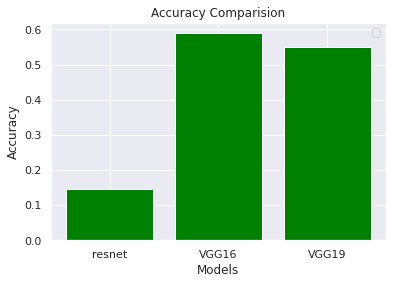

In [ ]:

y=np.array([ra['f1-score'].iat[0],v6a['f1-score'].iat[0],v9a['f1-score'].iat[0]])
x=np.array(['resnet','VGG16','VGG19'])

plt.bar(x,y,color = "green")

plt.title('Accuracy Comparision')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend()


plt.show()

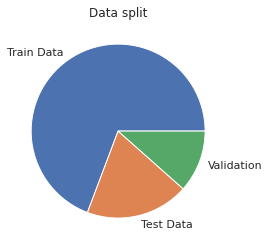

In [ ]:
y = np.array([1343, 372, 224])
labels = ["Train Data", "Test Data", "Validation"]
plt.pie(y,labels=labels)
plt.title('Data split')
plt.show() 

In [ ]:
ra

,Unnamed: 0,precision,recall,f1-score,support
0,accuracy,0.147321,0.147321,0.147321,0.147321
1,macro avg,0.178839,0.144119,0.120518,224.000000
2,weighted avg,0.184569,0.147321,0.120974,224.000000
